# CTU - 13: Machine Learning Models

In [1]:
file_path = "./final"

In [45]:
from tqdm import tqdm

## Importing libraries

In [2]:
import numpy as np  # for array
import pandas as pd  # for csv files and dataframe
import matplotlib.pyplot as plt  # for plotting
import seaborn as sns  # plotting
from scipy import stats
from category_encoders import hashing as hs
import itertools

import pickle  # To load data int disk
from prettytable import PrettyTable  # To print in tabular format
import os

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy.sparse import csr_matrix  # For sparse matrix

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.covariance import EllipticEnvelope
import xgboost as xgb

from sklearn.metrics import accuracy_score, confusion_matrix, make_scorer, classification_report, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import auc, f1_score, roc_curve, roc_auc_score, recall_score, precision_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_validate, cross_val_predict

%matplotlib inline

## Loading files

In [3]:
# Train and Test data
x_train, y_train, y_train_label = pickle.load(open(file_path+'/final_train.pkl', 'rb'))
x_test, y_test, y_test_label = pickle.load(open(file_path+'/final_test.pkl', 'rb'))

# Dictionaries
saved_dict = pickle.load(open(file_path+'/saved_dict.pkl', 'rb'))
mode_dict = pickle.load(open(file_path+'/mode_dict.pkl', 'rb'))

# Standard scaler
scaler = pickle.load(open(file_path+'/scaler.pkl', 'rb'))

# Onehot/Label encoders
ohe_dtos = pickle.load(open(file_path+'/ohe_dtos.pkl', 'rb'))
ohe_stos = pickle.load(open(file_path+'/ohe_stos.pkl', 'rb'))
ohe_dir = pickle.load(open(file_path+'/ohe_dir.pkl', 'rb'))
ohe_proto = pickle.load(open(file_path+'/ohe_proto.pkl', 'rb'))

In [4]:
# Making the train data sparse matrix
x_train_csr = csr_matrix(x_train.values)

col = x_train.columns

# Creating sparse dataframe with x_train sparse matrix
x_train = pd.DataFrame.sparse.from_spmatrix(x_train_csr, columns=col)

In [5]:
x_train

,dur,sport,dport,totpkts,totbytes,srcbytes,stos_0.0,stos_1.0,stos_2.0,stos_3.0,...,proto_llc,proto_pim,proto_rarp,proto_rsvp,proto_rtcp,proto_rtp,proto_tcp,proto_udp,proto_udt,proto_unas
0,0.000000e+00,0.000306,2.300602e-05,0.000000e+00,0.000000e+00,1.752639e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.077368e-06,0.822925,1.459837e-04,7.810340e-07,8.314675e-07,1.752639e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.902520e-08,0.852049,1.521243e-07,2.603447e-07,9.405356e-08,2.249221e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.654524e-01,0.523276,1.459837e-04,7.810340e-07,3.053908e-07,4.381598e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.691224e-04,0.015630,4.962964e-05,1.301723e-06,8.668792e-08,5.433182e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9950987,1.635193e-07,0.651607,1.459837e-04,2.603447e-07,1.393806e-07,2.190799e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9950988,1.282450e-07,0.823672,1.521243e-07,2.603447e-07,5.070960e-08,2.307642e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9950989,4.019621e-08,0.957311,4.965765e-04,2.603447e-07,1.869739e-08,1.927903e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9950990,6.918123e-08,0.636302,1.521243e-07,2.603447e-07,4.362725e-08,2.366063e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
x_train.sparse.to_dense().head()

,dur,sport,dport,totpkts,totbytes,srcbytes,stos_0.0,stos_1.0,stos_2.0,stos_3.0,...,proto_llc,proto_pim,proto_rarp,proto_rsvp,proto_rtcp,proto_rtp,proto_tcp,proto_udp,proto_udt,proto_unas
0,0.000000e+00,0.000306,2.300602e-05,0.000000e+00,0.000000e+00,1.752639e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.077368e-06,0.822925,1.459837e-04,7.810340e-07,8.314675e-07,1.752639e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,7.902520e-08,0.852049,1.521243e-07,2.603447e-07,9.405356e-08,2.249221e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3.654524e-01,0.523276,1.459837e-04,7.810340e-07,3.053908e-07,4.381598e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.691224e-04,0.015630,4.962964e-05,1.301723e-06,8.668792e-08,5.433182e-08,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [7]:
x_train.shape, y_train.shape

((9950992, 39), (9950992,))

## Pipeline functions

In [8]:
#------------------------------------------------------------------------------------------
# Data Cleaning
#------------------------------------------------------------------------------------------
def clean_data(data, saved_dict=saved_dict):
    '''
    Cleans given raw data. Performs various cleaning, removes Null and wrong values.
    Check for columns datatype and fix them.
    '''
    
    data.drop(columns=saved_dict['to_drop'], axis=1, inplace=True)
    
    # Cleaning the data
    data = data.drop(data[data['stos'] == 192.0].index)
    data['stos'] = data.stos.fillna(value=0.0)
    data['dtos'] = data.dtos.fillna(value=0.0)
    data.dropna(inplace=True) #drop sport and dport missing
    def is_hex(s):
        try:
            int(s, 16)
            return True
        except ValueError:
            return False

    def convertHexInSport(port):
        if str(int(port, 16)) != port:
            return int(port, 16)

        return int(port)
    
    data['sport'] = data['sport'].apply(convertHexInSport)
    data['dport'] = data['dport'].apply(convertHexInSport)
    
    return data


#------------------------------------------------------------------------------------------
# Standardizing: Mean centering an d varience scaling
#------------------------------------------------------------------------------------------
def standardize(data, saved_dict=saved_dict, scaler=scaler):
    '''
    Stanardize the given data. Performs mean centering and varience scaling.
    Using stanardscaler object trained on train data.
    '''
    data[saved_dict['num_col']] = scaler.transform(data[saved_dict['num_col']])
    return data

#------------------------------------------------------------------------------------------
# Onehot encoding of categorical columns
#------------------------------------------------------------------------------------------
def ohencoding(data, saved_dict=saved_dict, encoder=[ohe_dir, ohe_proto, ohe_stos, ohe_dtos]):
    '''
    Onehot encoding the categoricla columns.
    Add the ohe columns with the data and removes categorical columns.
    Using Onehotencoder objects trained on train data.
    '''
    # Adding encoding data to original data
    for col, encoding in zip(['stos', 'dtos', 'dir', 'proto'], [encoder[2], encoder[3], encoder[0], encoder[1]]):
        x = encoding.transform(data[col].values.reshape(-1,1))
        tmp_df = pd.DataFrame(x.toarray(), dtype='int64', columns=[col+'_'+str(i) for i in encoding.categories_[0]])
        data = data.reset_index(drop=True).join(tmp_df)
        data = data.drop(col, axis=1)
    return data

In [9]:
def get_final_data(data, saved_dict=saved_dict, scaler=scaler, encoder=[ohe_dir, ohe_proto, ohe_stos, ohe_dtos]):
    '''
    This functions takes raw input and convert that to model required output.
    '''
    
    
    data = clean_data(data, saved_dict)
    data = standardize(data, saved_dict, scaler)
    data = ohencoding(data, saved_dict, encoder)
    
    return data

## Training and validation of models

In [10]:
saved_dict

{'to_drop': ['starttime', 'srcaddr', 'dstaddr', 'state'],
 'moded_featute': {'dur': 0.0,
  'proto': 'udp',
  'sport': '13363',
  'dir': '  <->',
  'dport': '53',
  'stos': 0.0,
  'dtos': 0.0,
  'totpkts': 2,
  'totbytes': 214,
  'srcbytes': 81,
  'label': 'flow=To-Background-UDP-CVUT-DNS-Server',
  'target': 0},
 'cat_col': ['proto', 'dtos', 'dir', 'stos'],
 'num_col': ['dur', 'sport', 'dport', 'totpkts', 'totbytes', 'srcbytes']}

In [11]:
x_test

,dur,sport,dport,totpkts,totbytes,srcbytes,stos_0.0,stos_1.0,stos_2.0,stos_3.0,...,proto_llc,proto_pim,proto_rarp,proto_rsvp,proto_rtcp,proto_rtp,proto_tcp,proto_udp,proto_udt,proto_unas
0,5.256203e-01,0.069706,5.385758e-05,1.822413e-06,1.733758e-07,1.962956e-07,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1.848479e-07,0.803731,1.459837e-04,2.603447e-07,2.096374e-08,2.161589e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.117257e-08,0.878473,1.521243e-07,2.603447e-07,4.362725e-08,2.366063e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,8.476752e-08,0.820429,1.521243e-07,2.603447e-07,4.362725e-08,2.366063e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,1.002737e-04,0.044770,2.356072e-07,2.082757e-06,6.017161e-07,4.089492e-07,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4176836,4.656225e-05,0.034815,2.356072e-07,1.952585e-05,2.010565e-05,4.939522e-07,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4176837,5.632938e-08,0.859588,1.521243e-07,2.603447e-07,5.977500e-08,2.336853e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4176838,2.738838e-05,0.813878,1.521243e-07,7.810340e-07,9.178721e-08,7.448717e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4176839,1.894964e-07,0.701350,1.459837e-04,2.603447e-07,2.096374e-08,2.161589e-08,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [12]:
# Making test data sparse matrix
x_test_csr = csr_matrix(x_test.values)
col = x_test.columns

# Creating x_test sparse dataframe
x_test = pd.DataFrame.sparse.from_spmatrix(x_test_csr, columns=col)

In [13]:
x_train.shape, y_train.shape

((9950992, 39), (9950992,))

In [14]:
x_test.shape, y_test.shape

((4176841, 39), (4176841,))

In [15]:
all(x_train.columns == x_test.columns)

True

### Utility functions

In [16]:
def false_alarm_rate(y_true, y_pred):
    """
    This function will return False Alarm Rate for given true and predicted values.
    False Alarm Rate is average of False Negetive Rate and False Positive Rate
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    FPR = fp / (fp + tn)  # False positive rate
    FNR = fn / (fn + tp)  # False negetive rate
    return (FPR+FNR)/2  # False alarm rate

In [17]:
def hyperparam_tuning(clf, parameters, x, y, method='gridsearch', cv=None):
    """
    Utility function for Tuning hyperparameters
    """
    # initialization
    scoring = {'auc':'roc_auc',
               'f1':'f1',
               'FAR':make_scorer(false_alarm_rate, greater_is_better=False)}  # using custom scoring function FAR.
                
    # param tuning
    if method=='gridsearch':
        # As we are using multi scoring, So we need to point refit to scoring function with which we want to evaluate score
        tuning_clf = GridSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                  cv=cv, verbose=3, return_train_score=True, n_jobs=4)
        result = tuning_clf.fit(x, y)
    
    elif method=='randomsearch':
        tuning_clf = RandomizedSearchCV(clf, parameters, scoring=scoring, refit='auc',
                                        cv=cv, verbose=3, return_train_score=True)
        result = tuning_clf.fit(x, y)

    return result

In [18]:
def result_visualization(tuned_clf, parameters, param1=None, param2=None):
    """
    Utility function to plot the results obtained after hyper parameter tuning 
    """
    # getting train and test scores to plot
    train_score = tuned_clf.cv_results_['mean_train_auc']
    test_score = tuned_clf.cv_results_['mean_test_auc']

    # print results
    print("Best Score: {}".format(tuned_clf.best_score_))
    print("Best Parameters: {}".format(tuned_clf.best_params_))

    # Want to visualize score with 2 params, plot heatmap of the 3 variables
    if param2 is not None:
        # heatmap
        train_cmap=sns.light_palette("green")
        test_cmap=sns.light_palette("blue")
        
        # Figure and axis
        fig = plt.figure(figsize=(20,5))
        train_ax = fig.add_subplot(1,2,1)
        test_ax = fig.add_subplot(1,2,2)
        
        # train heatmap
        sns.heatmap(train_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=train_cmap, annot=True, fmt='.4f', ax=train_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # test heapmap
        sns.heatmap(test_score.reshape(len(parameters[param1]), len(parameters[param2])),
                    cmap=test_cmap, annot=True, fmt='.6f', ax=test_ax,
                    xticklabels=parameters[param2], yticklabels=parameters[param1])
        
        # axis labels and plot title
        train_ax.set_title("Train hyperparam heatmap")
        train_ax.set_xlabel(param2)
        train_ax.set_ylabel(param1)

        test_ax.set_title("Test hyperparam heatmap")
        test_ax.set_xlabel(param2)
        test_ax.set_ylabel(param1)
        plt.show()
    
    # Want to visualize score with one param, simply plot score and param
    else:
        plt.figure(figsize=(10,5))
        plt.plot(np.log10(parameters[param1]), train_score, label="train")
        plt.plot(np.log10(parameters[param1]), test_score, label="test")

        # Plot for train data
        for i, txt in enumerate(train_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], train_score[i]))
        
        # Plot for test data
        for i, txt in enumerate(test_score):
            plt.annotate((parameters[param1][i], np.round(txt, 3)), (np.log10(parameters[param1])[i], test_score[i]))
        
        plt.xlabel(param1)
        plt.ylabel('performance')
        plt.grid()
        plt.legend()
        plt.show()

In [27]:
def evaluate_result(clf, x_train, y_train, x_test, y_test, model_name):
    """ 
    Utility function to get result on test data from best found classifier using hyper parameter tuning.
    Print the accuracy and False Alarm Rate for both train and test.
    Plot confusion matrix of train and test.
    """
    cmap=sns.light_palette("blue")
    labels= ['non-attack', 'attack']
    
    # Training te best model
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)  # prediction on train data
    y_test_pred = clf.predict(x_test)  # prediction on test data
    
    # auc curve
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
    
    # Scores of train dataset
    train_auc = auc(train_fpr, train_tpr)
    train_f1 = f1_score(y_train, y_train_pred)
    train_far = false_alarm_rate(y_train, y_train_pred)
    
    # Scores of test dataset
    test_auc = auc(test_fpr, test_tpr)
    test_f1 = f1_score(y_test, y_test_pred)
    test_far = false_alarm_rate(y_test, y_test_pred)
    
    # Printing the result as a table
    x = PrettyTable()
    x.field_names = ['Dataset', 'Model', 'AUC', 'F1-score', 'False Alarm Rate']
    x.add_row(['Train', model_name, train_auc, train_f1, train_far])
    x.add_row(['Test', model_name, test_auc, test_f1, test_far])
    print(x)

    # Plot AUC curve
    plt.figure()
    plt.plot(train_fpr, train_tpr, label=f"Train AUC: {train_auc}")
    plt.plot(test_fpr, test_tpr, label=f"Test AUC: {test_auc}")
    plt.grid()
    plt.legend()
    plt.show()

    # Confusion martix of train and test
    # Train confusion matrix
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    sns.heatmap(confusion_matrix(y_train, y_train_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Train Confusion Matrix")

    # Test confusion matrix
    plt.subplot(1,2,2)
    sns.heatmap(confusion_matrix(y_test, y_test_pred),
                annot=True, cmap=cmap, fmt='d',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Test Confusion Matrix")
    plt.show()
    
    # Returning scores of test data
    return clf, test_auc, test_f1, test_far


### Decision Tree
Trying out DT for the next model.

Tune parameters for "max_depth", "min_samples_split" and "min_samples_leaf"

In [20]:
# DT classifier
clf = DecisionTreeClassifier(class_weight={0:0.05, 1:0.95})
param = {'max_depth':[8, 10, 12, 14],
         'min_samples_split':[2, 4, 6]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train, cv=3)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  9.5min
[Parallel(n_jobs=4)]: Done  36 out of  36 | elapsed: 14.6min finished


Best Score: 0.9982299054581046
Best Parameters: {'max_depth': 14, 'min_samples_split': 6}


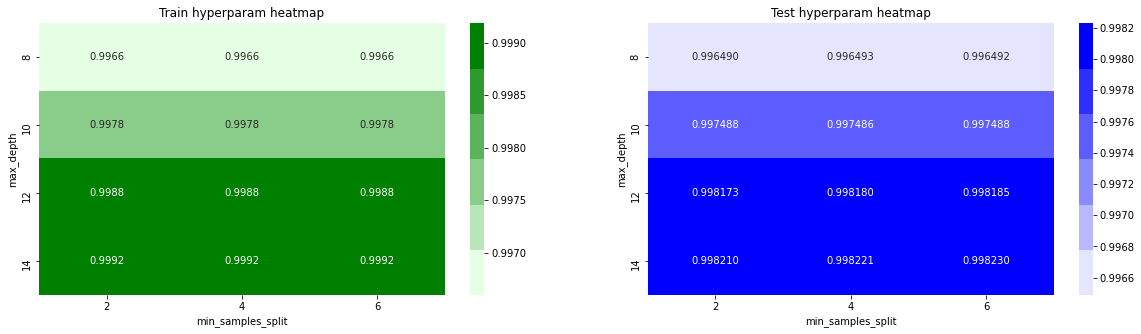

In [21]:
# Plotting heatmap of scores with params
result_visualization(dt_clf, param, 'max_depth', 'min_samples_split')

In [22]:
dt_clf.best_estimator_

DecisionTreeClassifier(class_weight={0: 0.05, 1: 0.95}, max_depth=14,
                       min_samples_split=6)

In [23]:
# Tuning "min_samples_leaf" on top of best found params
clf = dt_clf.best_estimator_
param = {'min_samples_leaf':[9, 11, 13]}

dt_clf = hyperparam_tuning(clf, param, x_train_csr, y_train,cv=3)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   6 out of   9 | elapsed:  3.3min remaining:  1.7min
[Parallel(n_jobs=4)]: Done   9 out of   9 | elapsed:  4.9min finished


Best Score: 0.9983400001280841
Best Parameters: {'min_samples_leaf': 13}


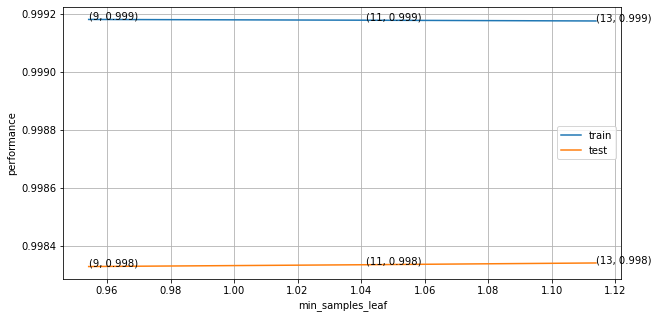

In [24]:
result_visualization(dt_clf, param, 'min_samples_leaf')

Best value of "min_samples_leaf" is 13

In [25]:
dt_param = {'max_depth': 14, 'min_samples_split': 6, 'min_samples_leaf':13}

dt_best_clf = DecisionTreeClassifier(**dt_param)

+---------+-------+--------------------+--------------------+----------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate   |
+---------+-------+--------------------+--------------------+----------------------+
|  Train  |   DT  | 0.9750622058833952 | 0.9546562500000001 | 0.024937794116604774 |
|   Test  |   DT  | 0.9658627665954107 | 0.9367598891408415 | 0.034137233404589296 |
+---------+-------+--------------------+--------------------+----------------------+


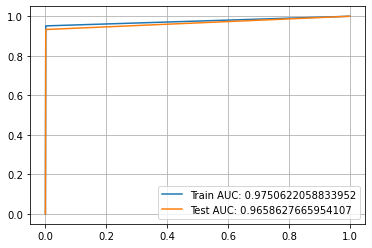

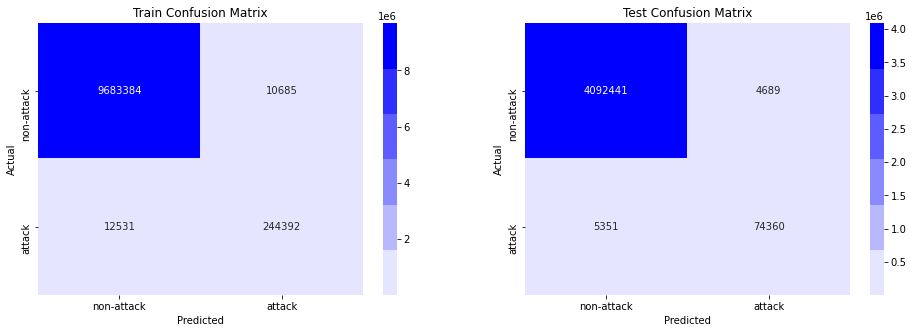

In [28]:
dt_clf, dt_auc, dt_f1, dt_far = evaluate_result(dt_best_clf, x_train_csr, y_train, x_test_csr, y_test, 'DT')

In [33]:
print(classification_report(dt_clf.predict(x_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   4097792
           1       0.93      0.94      0.94     79049

    accuracy                           1.00   4176841
   macro avg       0.97      0.97      0.97   4176841
weighted avg       1.00      1.00      1.00   4176841



In [29]:
# Saving the Model to disk
pickle.dump(dt_clf, open(file_path+'/dt_clf.pkl', 'wb'))

In [66]:
result_dict = {}

In [67]:
# Saving scores of DT
result_dict['name'] = ["DT"]
result_dict['auc'] = [dt_auc]
result_dict['f1'] = [dt_f1]
result_dict['far'] = [dt_far]

In [68]:
result_dict

{'name': ['DT'],
 'auc': [0.9658627665954107],
 'f1': [0.9367598891408415],
 'far': [0.034137233404589296]}

**Observation**
1. Tuning parameters for "max_depth", "min_sampples_split" and "min_samples_leaf".
2. Performance is mostly dependent on "max_depth" and less dependent on other 2 params.
3. Best parameters for the model max_depth=14, min_samples_split=6 and min_samples_leaf=13
4. Train and Test score is very close so no overfitting here

<br>

## Cross Validation function

For Random Forest, we will tuning its hyperparameters with train and cv data and using loops. Because the dataset is very large and with grid or randomsearch it will take so much time.

In [36]:
# Splitting train in train and cv data
x_train_new_csr, x_cv_csr, y_train, y_cv = train_test_split(x_train_csr, y_train, test_size=0.2, random_state=42)

In [37]:
x_train_new_csr.shape, y_train.shape, x_cv_csr.shape, y_cv.shape, x_test_csr.shape, y_test.shape

((7960793, 39),
 (7960793,),
 (1990199, 39),
 (1990199,),
 (4176841, 39),
 (4176841,))

In [43]:
def cross_validation(clf_name, param, param_tune,
                     x_train=x_train_new_csr, y_train=y_train, x_cv=x_cv_csr, y_cv=y_cv):
    """
    Using this function to cross validate with train and cv data.
    Parameters:
        clf_name = Name of the classifier
        param = Dictionary of hyperparameters and params for classifier
        param_tune = Name of the parameter to tune
        x_train, y_train = Train data and Train label
        x_cv, y_cv = CV data and CV label
    """
    # Initializing empty list to store train and cv scores
    train_auc_list = []
    cv_auc_list = []
    
    # Assigning arguments to variables
    hyper_param = param_tune
    values = param.pop(hyper_param)
    classifier = clf_name

    # Looping through the list of hyper parameter
    for i in tqdm(values):
        clf = classifier(**{hyper_param:i}, **param, n_jobs=-1)
        clf.fit(x_train, y_train)  # Training

        # Predicting probability of targets
        y_train_pred = clf.predict_proba(x_train)[:,1]
        y_cv_pred = clf.predict_proba(x_cv)[:,1]

        # Getting scores
        train_auc_list.append(roc_auc_score(y_train, y_train_pred))
        cv_auc_list.append(roc_auc_score(y_cv, y_cv_pred))

        print("For {}: {}, train auc: {} and test auc {}".format(hyper_param, i, train_auc_list[-1], cv_auc_list[-1]))
    
    # Plotting scores
    plt.figure(figsize=(10,5))
    plt.plot(values, train_auc_list, label="train")
    plt.plot(values, cv_auc_list, label="cv")

    for i, txt in enumerate(train_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], train_auc_list[i]))
    for i, txt in enumerate(cv_auc_list):
        plt.annotate((values[i], np.round(txt, 3)), (values[i], cv_auc_list[i]))
    
    plt.xlabel(hyper_param)
    plt.ylabel('auc score')
    plt.grid()
    plt.legend()
    plt.show()

    # Finding best parameter with highest cv score
    best_param = np.argmax(cv_auc_list)
    clf = classifier(**{hyper_param:values[best_param]}, **param)  # Trained model

    return clf, hyper_param, values[best_param]

### Random Forest

Trying Random Forest Classifier next.
<br>
Tuning 'n_estimators', 'max_depth', 'min_samples_split' and 'criterion'

In [39]:
# Classifier Name
CLF_NAME = RandomForestClassifier

 33%|███▎      | 1/3 [01:31<03:02, 91.47s/it]

For n_estimators: 10, train auc: 0.9994658543236871 and test auc 0.9987849981192984


 67%|██████▋   | 2/3 [03:20<01:36, 96.72s/it]

For n_estimators: 15, train auc: 0.9997256707944384 and test auc 0.9992524347507258


100%|██████████| 3/3 [05:45<00:00, 115.16s/it]

For n_estimators: 20, train auc: 0.9997594880422691 and test auc 0.9994757979715367


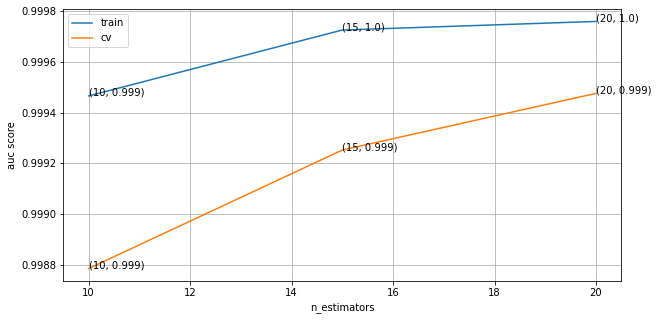

In [46]:
# Tuning No of estimators
param = {'n_estimators':[10, 15, 20]}
rf_clf, param1, val1 = cross_validation(CLF_NAME, param, 'n_estimators')

 50%|█████     | 1/2 [06:11<06:11, 371.82s/it]

For criterion: gini, train auc: 0.9985797483199563 and test auc 0.9984732952035827


100%|██████████| 2/2 [12:02<00:00, 361.05s/it]

For criterion: entropy, train auc: 0.9985700013915435 and test auc 0.998483805616518


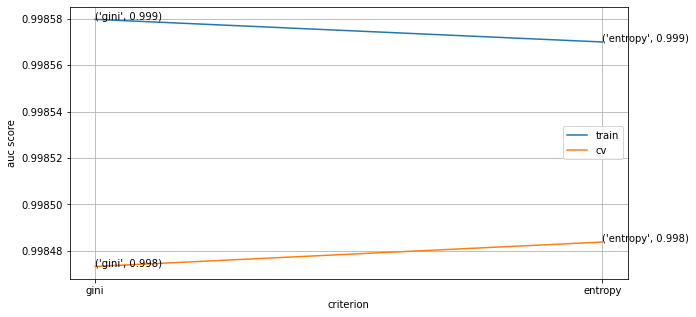

In [47]:
# Tuning Criterion
param = {'criterion':['gini', 'entropy'], 'min_samples_split':6, 'max_depth':14}
dt_clf, _, _ = cross_validation(CLF_NAME, param, 'criterion')

In [48]:
# Best RandomForest model
rf_bst_clf = RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=6, n_estimators=20, n_jobs=4)

+---------+-------+--------------------+--------------------+---------------------+
| Dataset | Model |        AUC         |      F1-score      |   False Alarm Rate  |
+---------+-------+--------------------+--------------------+---------------------+
|  Train  |   RF  | 0.9552339203237474 | 0.9253718095388378 | 0.04476607967625265 |
|   Test  |   RF  | 0.9385370330471765 | 0.896185071685849  | 0.06146296695282344 |
+---------+-------+--------------------+--------------------+---------------------+


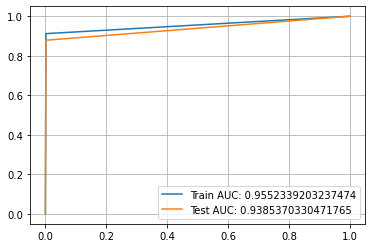

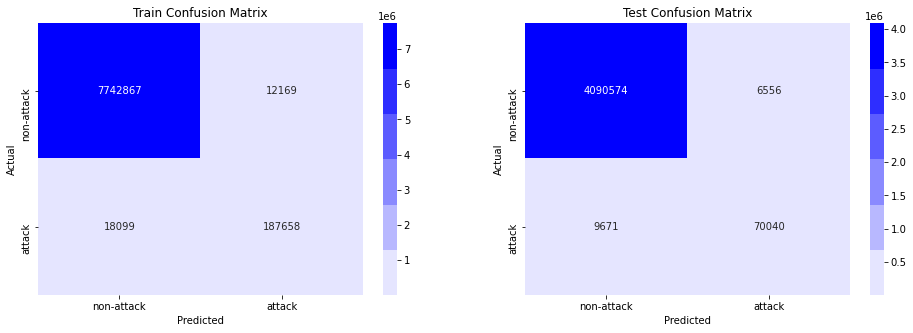

(RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_split=6,
                        n_estimators=20, n_jobs=4),
 0.9385370330471765,
 0.896185071685849,
 0.06146296695282344)

In [49]:
# Getting result on train and test data
evaluate_result(rf_bst_clf, x_train_new_csr, y_train, x_test_csr, y_test, "RF")

**Observation**
1. Tuning lots of parameters for this classifier with appropriate values.
2. Performance is mostly dependent on "n_estimators", "max_depth" and less dependent on other 2 params.
3. Best parameters for the model: criterion='entropy', max_depth=22, min_samples_split=6, n_estimators=300
4. Train and Test score is  close but compared to above models there is a gap between train and test score. So it is overfitting on train data if wwe compare with above models. But the gap is very low so not much of overfitting.
5. The result is not good than Decision Tree. Both False Positive and Flase Negative are increase 

In [50]:
pickle.dump(rf_bst_clf, open(file_path+'/rf_best_clf.pkl', 'wb'))

In [69]:
# Adding results
result_dict['name'].append('RF')
result_dict['auc'].append(0.9385370330471765)
result_dict['f1'].append(0.896185071685849)
result_dict['far'].append(0.06146296695282344)

In [70]:
pd.DataFrame(result_dict)

,name,auc,f1,far
0,DT,0.965863,0.936760,0.034137
1,RF,0.938537,0.896185,0.061463


In [71]:
pickle.dump(result_dict, open(file_path+'/final_result_dict.pkl', 'wb'))